In [1]:
library("dplyr")
library("ggplot2")
library("geosphere")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [26]:
pdf <- function(k, lambda) {
  num <- lambda ^ k * exp(-lambda)
  den <- factorial(k) * (1 - exp(-lambda))

  return(num / den)
}

cdf <- function(n, lambda) {
  cumulative_probability <- 0
  probabilities <- rep(0, n)

  for (k in 1:n) {
    probabilities[k] <- cumulative_probability
    cumulative_probability <- cumulative_probability + pdf(k, lambda)
  }

  return(probabilities)
}

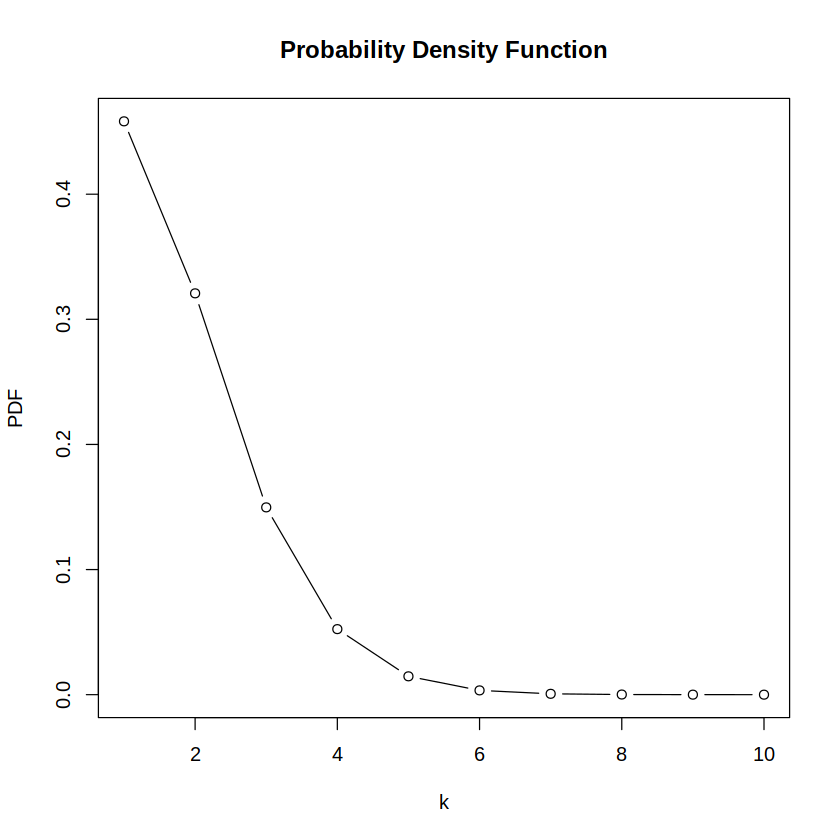

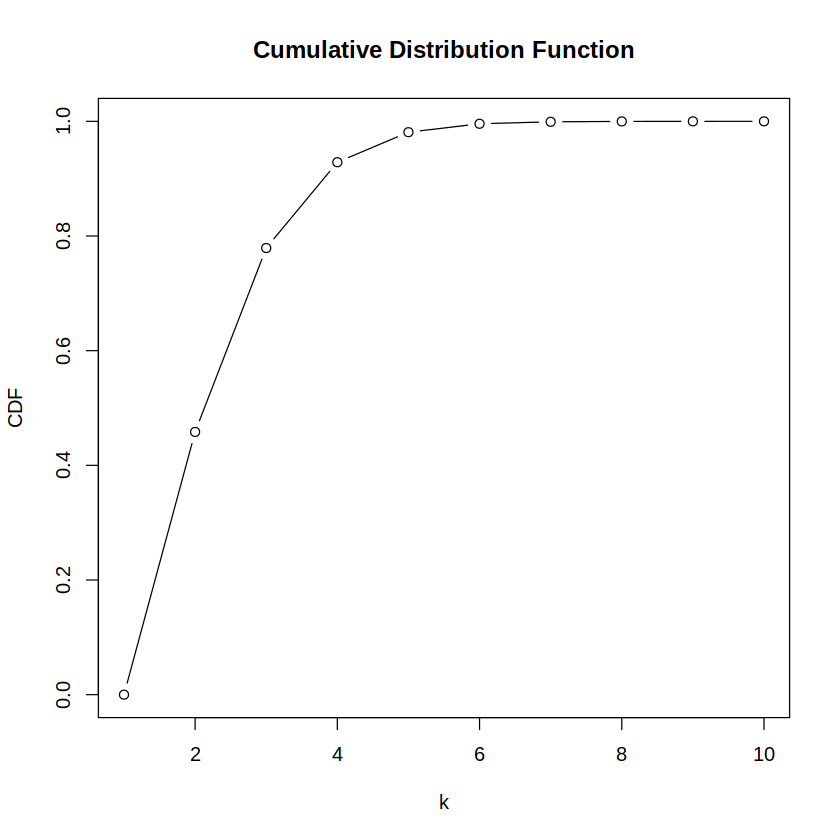

In [27]:
lambda <- 1.4  # Example lambda value
k_values <- 1:10

pdf_values <- pdf(k_values, lambda)
cdf_values <- cdf(10, lambda)

plot(k_values, pdf_values, type = "b", xlab = "k", ylab = "PDF", main = "Probability Density Function")

plot(k_values, cdf_values, type = "b", xlab = "k", ylab = "CDF", main = "Cumulative Distribution Function")

In [30]:
k_mean <- sum(k_values * pdf(k_values, lambda))
variance <- sum((k_values ^ 2) * pdf(k_values, lambda)) - (k_mean ^ 2)

k_mean
variance

[1] 1.858231

[1] 1.006695

[1] 1.8445

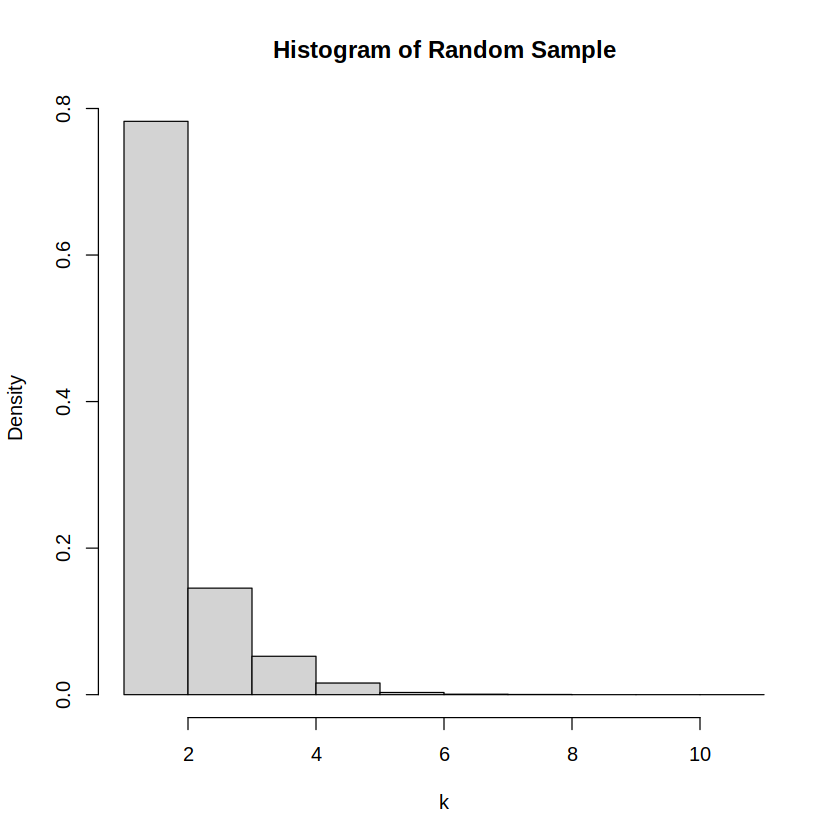

In [154]:
sample <- sample(k_values, size = 10000,  replace = TRUE, prob = pdf_values)

bin_width <- 1
breaks <- seq(min(k_values), max(k_values) + bin_width, by = bin_width)

hist(sample, breaks = breaks, freq = FALSE, main = "Histogram of Random Sample", xlab = "k")

mean(sample)

In [188]:
pdf_muons <- function(E, E0 = 7.25, gamma = 2.7) {
  ifelse(E < E0, 1, (E - E0 + 1)^(-gamma))
}

integral <- integrate(pdf_muons, lower = 0, upper = Inf)
N <- 1/integral$value

N

[1] 0.1275797

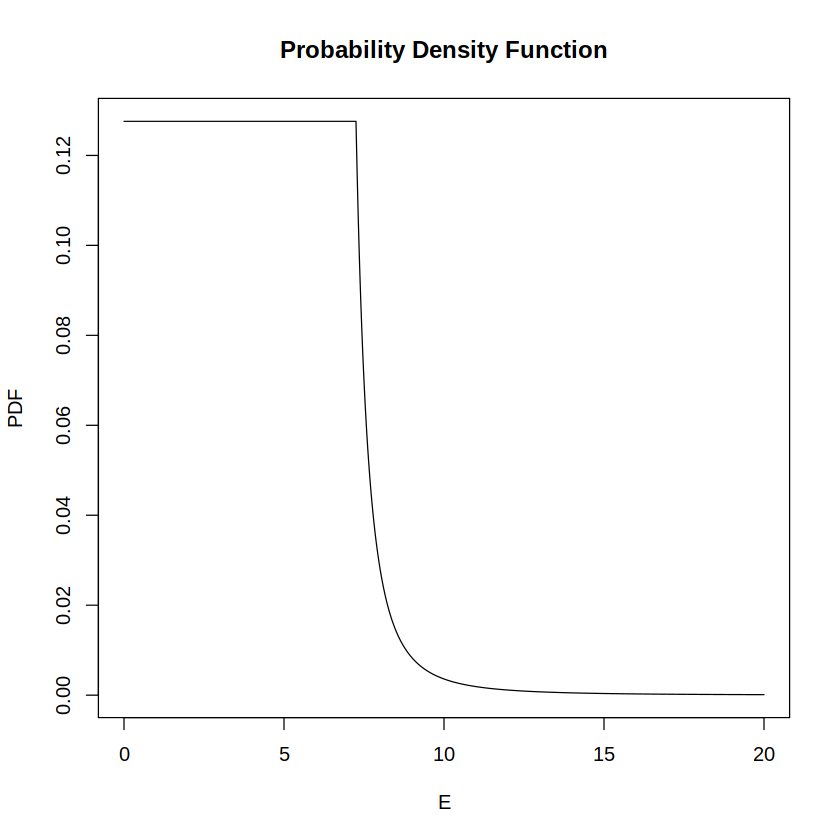

In [189]:
pdf_muons <- function(E, E0 = 7.25, gamma = 2.7) {
  ifelse(E < E0, N, N *(E - E0 + 1)^(-gamma))
}


E_values <- seq(0, 20, by = 0.01)
pdf_values_muons <- pdf_muons(E_values)

plot(E_values, pdf_values_muons, type = "l", xlab = "E", ylab = "PDF", main = "Probability Density Function")

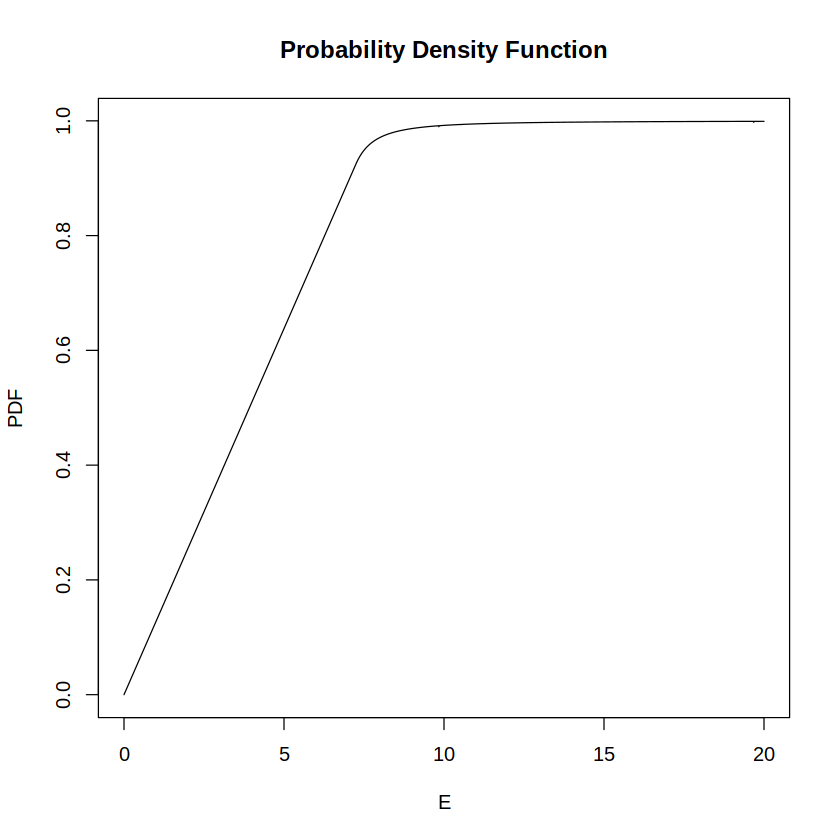

In [200]:
cdf_muons <- function(E_values, E0 = 7.25, gamma = 2.7) {
  cumulative_prob <- rep(0, length(E_values))
  for (i in seq_along(E_values)) {
    cumulative_prob[i] <- integrate(pdf_muons, lower = 0, upper = E_values[i])$value
  }
  return(cumulative_prob)
}

cdf_values_muons <- cdf_muons(E_values)

plot(E_values, cdf_values_muons, type = "l", xlab = "E", ylab = "PDF", main = "Probability Density Function")

In [201]:
mean_muons <- integrate(function(x) x * pdf_muons(x), lower = 0, upper = Inf)
mean_muons

4.004251 with absolute error < 0.00016

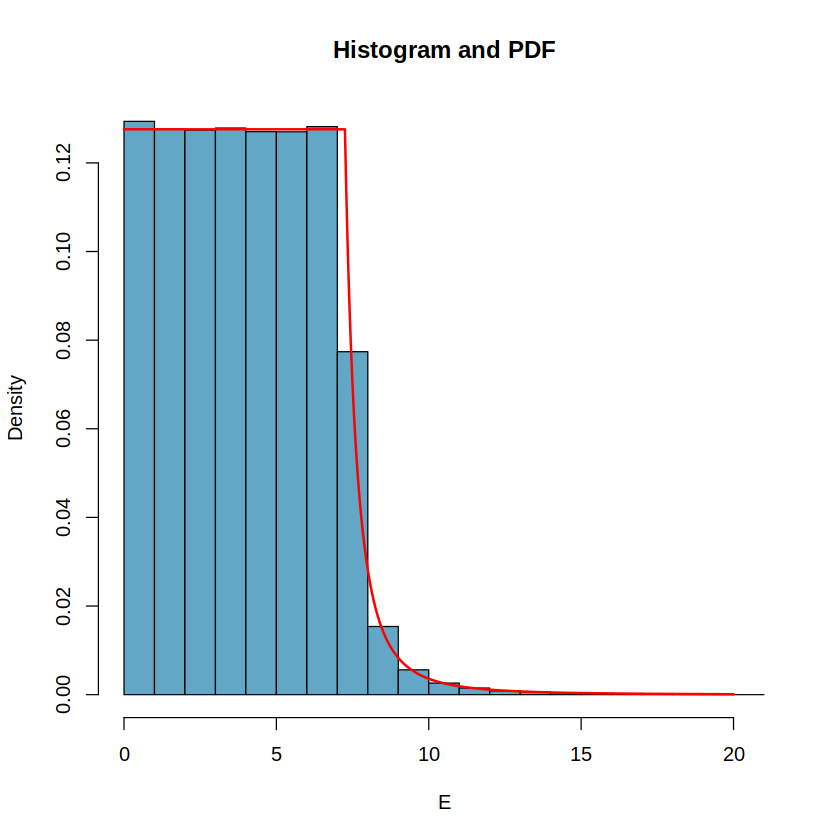

In [208]:
sample <- sample(E_values, size = 10^6,  replace = TRUE, prob = pdf_values_muons)

bin_width <- 1
breaks <- seq(min(E_values), max(E_values) + bin_width, by = bin_width)

hist(sample, breaks = breaks, freq = FALSE, main = "Histogram and PDF", xlab = "E", col = "#62a7c5")
lines(E_values, pdf_values_muons, type = "l", xlab = "E", ylab = "PDF", col = "red", lwd = 2)